<a href="https://colab.research.google.com/github/sahil301290/Deep-Learning/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Least Square Error based Linear Regression

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['target'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


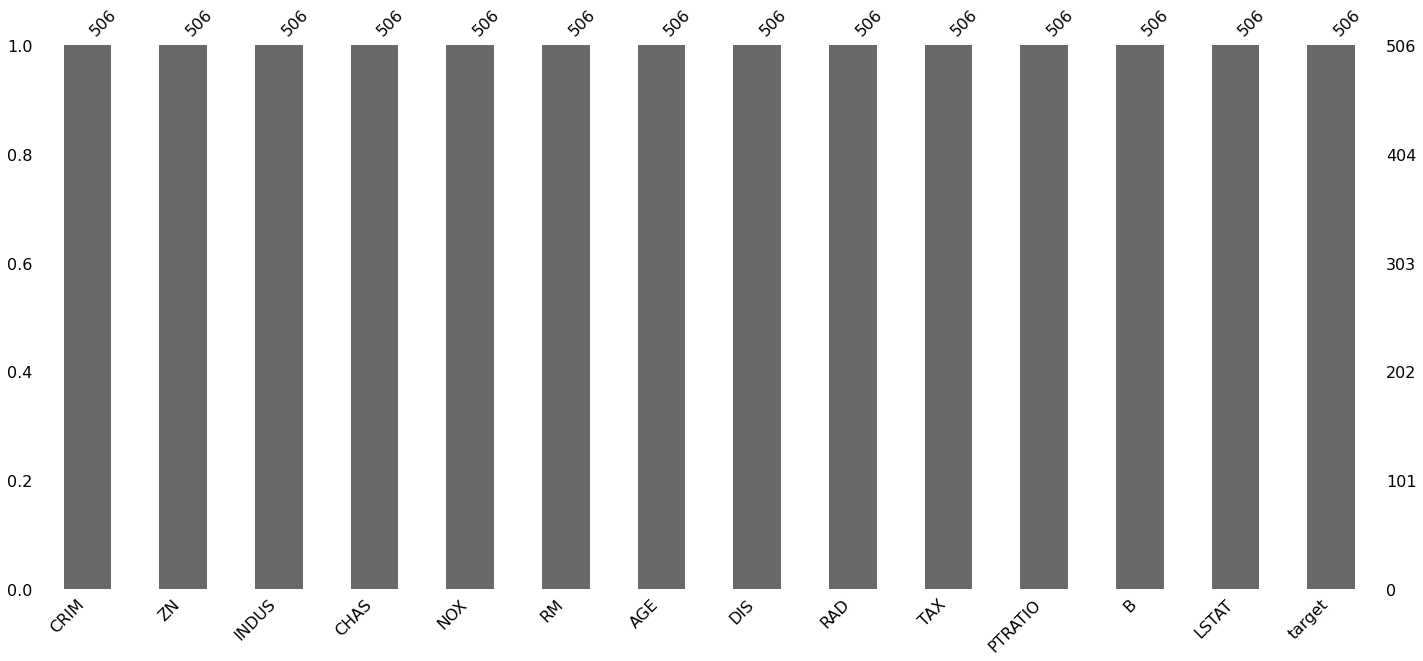

In [ ]:
import missingno as ms
ms.bar(df)

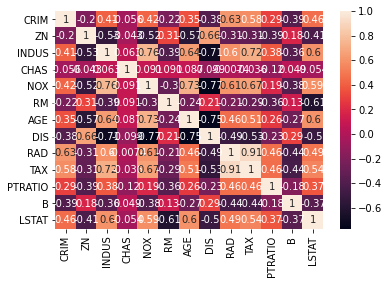

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:13].corr(),annot=True)

In [ ]:
import numpy as np
X=df.iloc[:,0:13]
Y=df.iloc[:,13]
Y=np.array(Y)
Y=Y.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
X_scaled

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 14)
(152, 14)
(354, 1)
(152, 1)


In [ ]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[22.50945471]
 [-1.14691411]
 [ 0.83432605]
 [ 0.33940694]
 [ 0.79163612]
 [-1.784727  ]
 [ 2.84783949]
 [-0.30429306]
 [-2.91562521]
 [ 2.11140045]
 [-1.46519951]
 [-1.9696347 ]
 [ 1.07567771]
 [-3.90310727]]


In [ ]:
y_predict=X_test.dot(beta)
print(y_predict)
#print(len(y_predict))

[[28.64896005]
 [36.49501384]
 [15.4111932 ]
 [25.40321303]
 [18.85527988]
 [23.14668944]
 [17.3921241 ]
 [14.07859899]
 [23.03692679]
 [20.59943345]
 [24.82286159]
 [18.53057049]
 [-6.86543527]
 [21.80172334]
 [19.22571177]
 [26.19191985]
 [20.27733882]
 [ 5.61596432]
 [40.44887974]
 [17.57695918]
 [27.44319095]
 [30.1715964 ]
 [10.94055823]
 [24.02083139]
 [18.07693812]
 [15.934748  ]
 [23.12614028]
 [14.56052142]
 [22.33482544]
 [19.3257627 ]
 [22.16564973]
 [25.19476081]
 [25.31372473]
 [18.51345025]
 [16.6223286 ]
 [17.50268505]
 [30.94992991]
 [20.19201752]
 [23.90440431]
 [24.86975466]
 [13.93767876]
 [31.82504715]
 [42.56978796]
 [17.62323805]
 [27.01963242]
 [17.19006621]
 [13.80594006]
 [26.10356557]
 [20.31516118]
 [30.08649576]
 [21.3124053 ]
 [34.15739602]
 [15.60444981]
 [26.11247588]
 [39.31613646]
 [22.99282065]
 [18.95764781]
 [33.05555669]
 [24.85114223]
 [12.91729352]
 [22.68101452]
 [30.80336295]
 [31.63522027]
 [16.29833689]
 [21.07379993]
 [16.57699669]
 [20.36362

In [ ]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)

21.51744423117728


In [ ]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

4.6386899261728285


In [ ]:
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
r_square = 1-sum_square_error/total_variance
print(r_square)

0.7112260057484923


Ridge Regression OR L2 Regularization

In [ ]:
from sklearn.linear_model import Ridge
#help(sklearn)

In [ ]:
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
test_predictions = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)

In [ ]:
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
print(MAE)
print(MSE)
print(RMSE)

3.154483486128104
21.66898820096513
4.654996047362998


Ridge Regression using cross validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0),scoring = 'neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [ ]:
ridge_cv_model.alpha_

10.0

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print(MSE)

21.80735050422571


In [ ]:
ridge_cv_model.coef_

array([[ 0.        , -1.04040626,  0.66864277,  0.12846482,  0.83388741,
        -1.49067193,  2.89287727, -0.32262973, -2.57086271,  1.49677766,
        -0.95530252, -1.88328338,  1.04572559, -3.759766  ]])

LASSO - Least Absolute Shrinkage and Selection Operator

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv = 5, max_iter=1000)

In [ ]:
lasso_cv_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.1, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print(MSE)

25.777713740899806


In [ ]:
lasso_cv_model.coef_

array([ 0.        , -0.12635295,  0.        , -0.        ,  0.47671033,
       -0.        ,  2.84044085, -0.        , -0.        , -0.        ,
       -0.        , -1.37514121,  0.44851197, -3.76557211])